In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
1)  Alcohol

2)  Malic acid

3)  Ash

4)  Alcalinity of ash

5)  Magnesium

6)  Total phenols

7)  Flavanoids

8)  Nonflavanoid phenols

9)  Proanthocyanins

10) Color intensity

11) Hue

12) OD280/OD315 of diluted wines

13) Proline

In [2]:
columns = ['wine Type',
           'Alcohol',
           'Malic acid',
           'Ash',
           'Alcalinity of ash',
           'Magnesium',
           'Total phenols',
           'Flavanoids',
           'Nonflavanoid phenols',
           'Proanthocyanins',
           'Color intensity',
           'Hue',
           'OD280/OD315 of diluted wines',
           'Proline']


data = pd.read_csv('data/wine.data', sep=',')
data.columns = columns


In [3]:
data.describe()

,wine Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine Type                     177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

# Data analisys

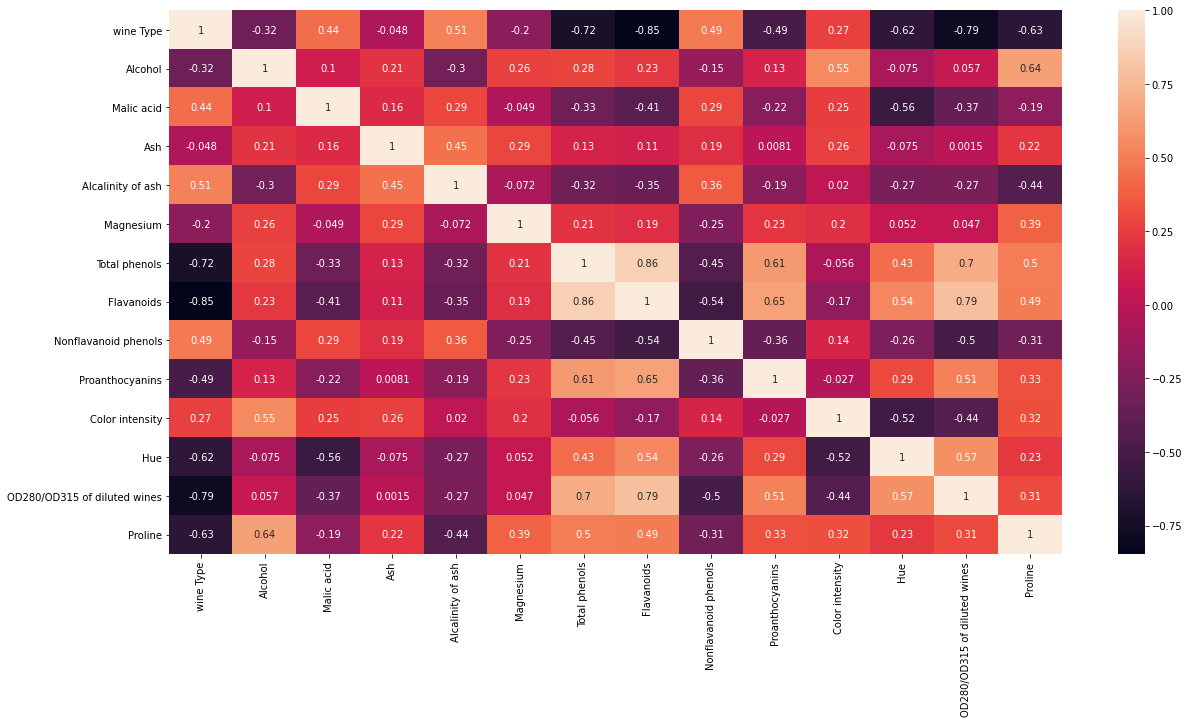

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);

In [6]:
dataValuable = []
dataCorr     = data.corr().to_numpy()[0][1:]
aux          = dataCorr > -5
_columns = columns[1:]

print('Valuable Data to model:')
for i in range(13):
    if aux[i]:
        print('{:25}\t{:.3f} %'.format(_columns[i], 100*dataCorr[i]))
        dataValuable.append(_columns[i])
        
del aux, dataCorr


dataLabel    = data[columns[0]]
dataValuable = data[columns[1:]]

print('-'*40)

print('{:30}\t{}'.format('Data label array shape:',dataLabel.shape))
print('{:30}\t{}'.format('Valuable Data array shape:',dataValuable.shape))


Valuable Data to model:
Alcohol                  	-32.124 %
Malic acid               	43.613 %
Ash                      	-4.826 %
Alcalinity of ash        	51.396 %
Magnesium                	-19.894 %
Total phenols            	-71.793 %
Flavanoids               	-84.649 %
Nonflavanoid phenols     	48.721 %
Proanthocyanins          	-49.489 %
Color intensity          	26.856 %
Hue                      	-61.769 %
OD280/OD315 of diluted wines	-78.643 %
Proline                  	-63.123 %
----------------------------------------
Data label array shape:       	(177,)
Valuable Data array shape:    	(177, 13)


In [7]:
print('index of wine 1:[:{}]'.format(np.count_nonzero(dataLabel.to_numpy() == 1)))
print('index of wine 2:[{}:{}]'.format(np.count_nonzero(dataLabel.to_numpy() == 1),np.count_nonzero(dataLabel.to_numpy() == 1)+np.count_nonzero(dataLabel.to_numpy() == 2) ))
print('index of wine 3:[{}:]'.format(np.count_nonzero(dataLabel.to_numpy() == 1)+np.count_nonzero(dataLabel.to_numpy() == 2)))

index of wine 1:[:58]
index of wine 2:[58:129]
index of wine 3:[129:]


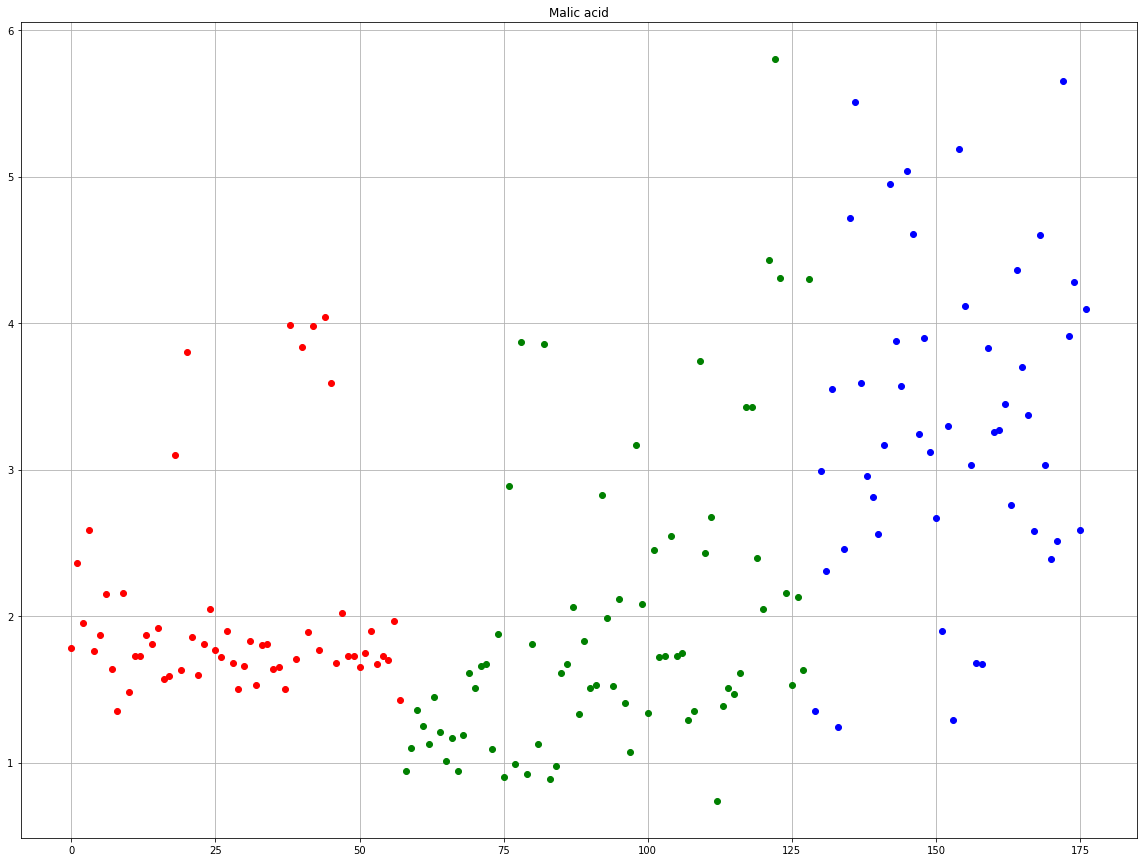

In [8]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Malic acid'].to_numpy()
plt.title('Malic acid')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3


plt.grid()

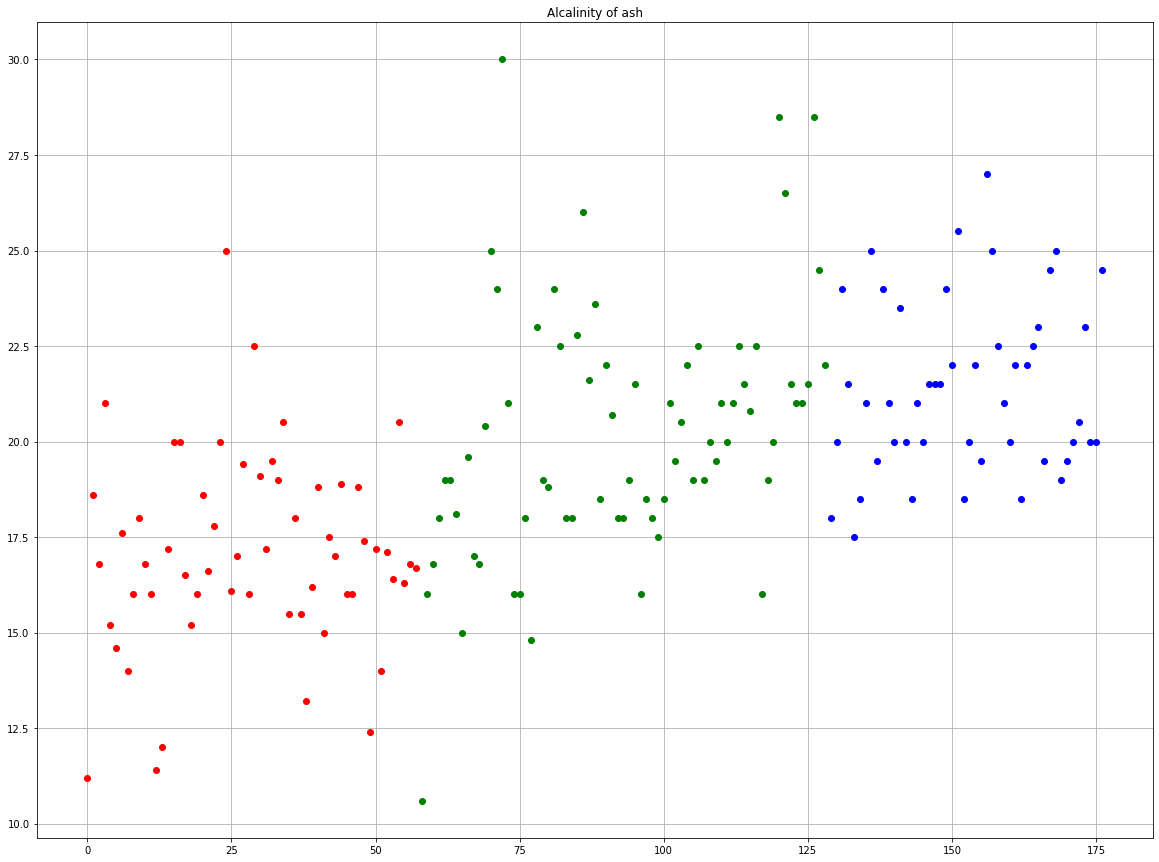

In [9]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Alcalinity of ash'].to_numpy()
plt.title('Alcalinity of ash')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3

plt.grid()

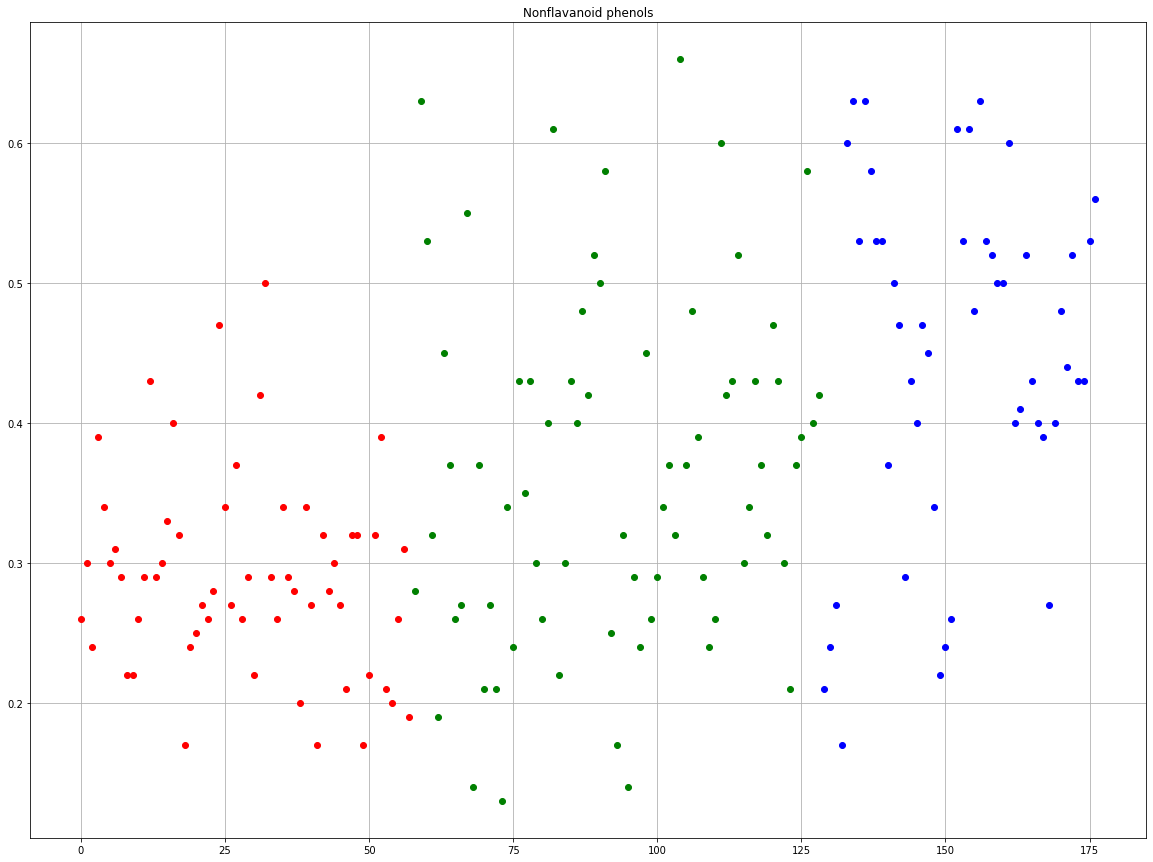

In [10]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Nonflavanoid phenols'].to_numpy()
plt.title('Nonflavanoid phenols')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3

plt.grid()

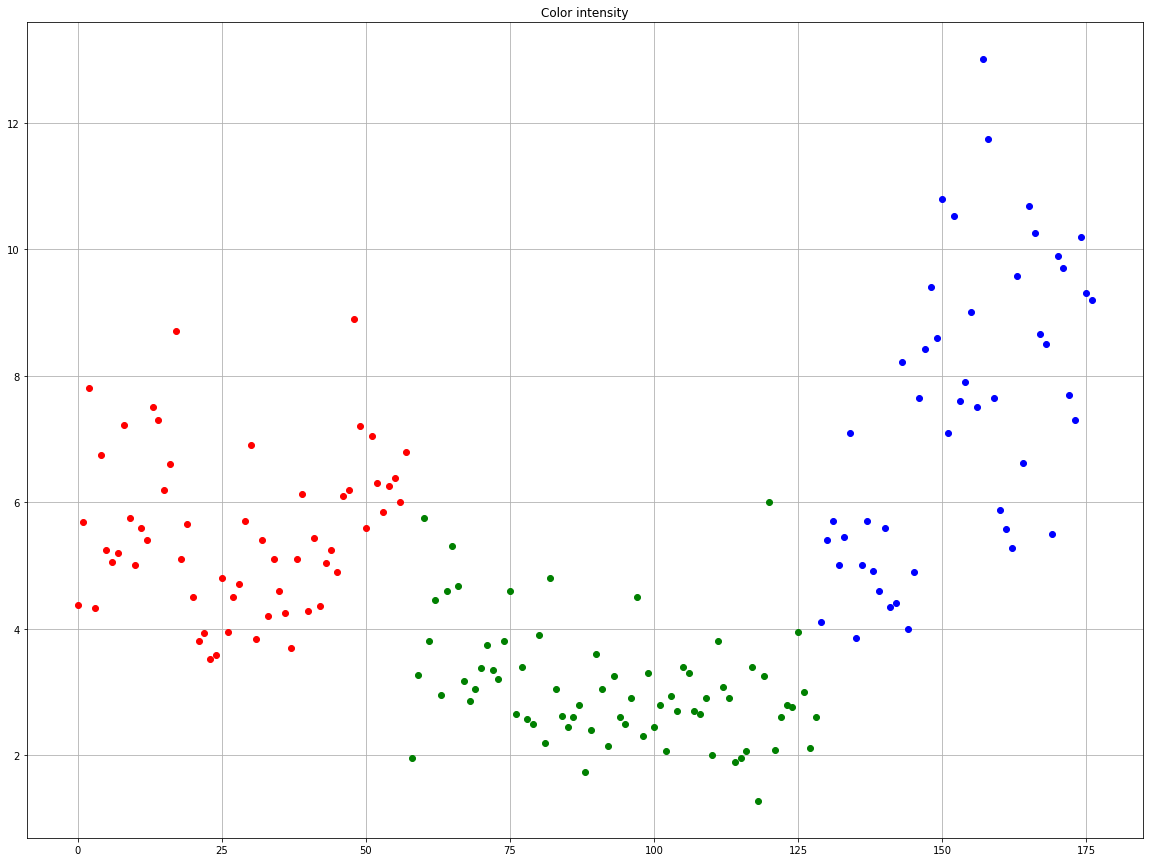

In [11]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Color intensity'].to_numpy()
plt.title('Color intensity')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3

plt.grid()

# model construction

In [12]:
dataLabel    = dataLabel.to_numpy() - 1
dataLabel = tf.keras.utils.to_categorical(dataLabel, 3)
dataValuable = data.to_numpy()

print('{:30}\t{}'.format('Data label array shape:',dataLabel.shape))
print('{:30}\t{}'.format('Valuable Data array shape:',dataValuable.shape))

Data label array shape:       	(177, 3)
Valuable Data array shape:    	(177, 14)


In [13]:

from sklearn.model_selection import train_test_split



dataValuableTrain, dataValuableTest, dataLabelTrain ,dataLabelTest = train_test_split(dataValuable, dataLabel, test_size=0.2, random_state=5)

nEpochs       = 500
percentSplit  = 0.2


In [15]:
modelo_3 = tf.keras.models.Sequential()
modelo_3.add(tf.keras.layers.Dense( units = 400, activation = 'tanh', input_shape = (14,) ))
modelo_3.add(tf.keras.layers.Dropout(0.2))
modelo_3.add(tf.keras.layers.Dense( units = 500, activation = 'tanh' ))
modelo_3.add(tf.keras.layers.Dropout(0.2))
modelo_3.add(tf.keras.layers.Dense( units = 500, activation = 'tanh' ))
modelo_3.add(tf.keras.layers.Dropout(0.2))
modelo_3.add(tf.keras.layers.Dense( units = 300, activation = 'tanh' ))
modelo_3.add(tf.keras.layers.Dropout(0.2))
modelo_3.add(tf.keras.layers.Dense( units = 200, activation = 'tanh' ))
modelo_3.add(tf.keras.layers.Dropout(0.2))
modelo_3.add(tf.keras.layers.Dense( units = 3  , activation = 'softmax' ))
modelo_3.compile( optimizer = 'Adamax' , loss='CategoricalCrossentropy',metrics=['accuracy'])
hist_3 = modelo_3.fit(dataValuableTrain, dataLabelTrain, epochs = nEpochs, batch_size = 35, validation_split = percentSplit,verbose =1)

Epoch 1/500
4/4 [==============================] - 3s 310ms/step - loss: 1.7798 - accuracy: 0.3324 - val_loss: 1.6800 - val_accuracy: 0.4483
Epoch 2/500
4/4 [==============================] - 0s 126ms/step - loss: 1.4319 - accuracy: 0.3557 - val_loss: 1.3890 - val_accuracy: 0.2759
Epoch 3/500
4/4 [==============================] - 0s 126ms/step - loss: 1.2444 - accuracy: 0.4207 - val_loss: 0.9809 - val_accuracy: 0.4483
Epoch 4/500
4/4 [==============================] - 0s 111ms/step - loss: 1.0916 - accuracy: 0.4117 - val_loss: 0.9419 - val_accuracy: 0.4483
Epoch 5/500
4/4 [==============================] - 0s 94ms/step - loss: 1.0389 - accuracy: 0.4626 - val_loss: 0.8387 - val_accuracy: 0.6552
Epoch 6/500
4/4 [==============================] - 1s 160ms/step - loss: 1.0946 - accuracy: 0.4557 - val_loss: 0.7628 - val_accuracy: 0.6552
Epoch 7/500
4/4 [==============================] - 1s 150ms/step - loss: 0.9500 - accuracy: 0.5226 - val_loss: 0.6971 - val_accuracy: 0.6897
Epoch 8/500
4/

Epoch 59/500
4/4 [==============================] - 0s 109ms/step - loss: 0.6565 - accuracy: 0.6479 - val_loss: 0.5825 - val_accuracy: 0.6897
Epoch 60/500
4/4 [==============================] - 0s 67ms/step - loss: 0.5810 - accuracy: 0.7629 - val_loss: 0.5101 - val_accuracy: 0.6897
Epoch 61/500
4/4 [==============================] - 0s 105ms/step - loss: 0.6013 - accuracy: 0.6874 - val_loss: 0.5635 - val_accuracy: 0.8276
Epoch 62/500
4/4 [==============================] - 0s 116ms/step - loss: 0.5821 - accuracy: 0.7452 - val_loss: 0.6416 - val_accuracy: 0.6897
Epoch 63/500
4/4 [==============================] - 0s 106ms/step - loss: 0.5835 - accuracy: 0.7269 - val_loss: 0.4394 - val_accuracy: 0.7931
Epoch 64/500
4/4 [==============================] - 0s 112ms/step - loss: 0.6752 - accuracy: 0.6824 - val_loss: 0.4360 - val_accuracy: 0.8966
Epoch 65/500
4/4 [==============================] - 0s 96ms/step - loss: 0.5686 - accuracy: 0.7102 - val_loss: 0.5697 - val_accuracy: 0.7586
Epoch 66

Epoch 117/500
4/4 [==============================] - 0s 86ms/step - loss: 0.2550 - accuracy: 0.8821 - val_loss: 0.3782 - val_accuracy: 0.8276
Epoch 118/500
4/4 [==============================] - 0s 116ms/step - loss: 0.3034 - accuracy: 0.8929 - val_loss: 0.1844 - val_accuracy: 0.9310
Epoch 119/500
4/4 [==============================] - 0s 113ms/step - loss: 0.2238 - accuracy: 0.8998 - val_loss: 0.1318 - val_accuracy: 0.9310
Epoch 120/500
4/4 [==============================] - 0s 114ms/step - loss: 0.3196 - accuracy: 0.8990 - val_loss: 0.1861 - val_accuracy: 0.9310
Epoch 121/500
4/4 [==============================] - 0s 90ms/step - loss: 0.3016 - accuracy: 0.8776 - val_loss: 0.2482 - val_accuracy: 0.8966
Epoch 122/500
4/4 [==============================] - 0s 78ms/step - loss: 0.4138 - accuracy: 0.8202 - val_loss: 0.3357 - val_accuracy: 0.8621
Epoch 123/500
4/4 [==============================] - 0s 112ms/step - loss: 0.1606 - accuracy: 0.9443 - val_loss: 0.3404 - val_accuracy: 0.8621
Ep

4/4 [==============================] - 0s 86ms/step - loss: 0.2665 - accuracy: 0.8788 - val_loss: 0.2336 - val_accuracy: 0.8966
Epoch 175/500
4/4 [==============================] - 0s 81ms/step - loss: 0.1911 - accuracy: 0.9383 - val_loss: 0.1062 - val_accuracy: 0.9655
Epoch 176/500
4/4 [==============================] - 0s 91ms/step - loss: 0.2570 - accuracy: 0.8981 - val_loss: 0.3573 - val_accuracy: 0.9310
Epoch 177/500
4/4 [==============================] - 0s 88ms/step - loss: 0.2059 - accuracy: 0.9112 - val_loss: 0.2998 - val_accuracy: 0.8621
Epoch 178/500
4/4 [==============================] - 0s 104ms/step - loss: 0.1637 - accuracy: 0.9460 - val_loss: 0.2328 - val_accuracy: 0.8966
Epoch 179/500
4/4 [==============================] - 0s 101ms/step - loss: 0.1513 - accuracy: 0.9162 - val_loss: 0.3625 - val_accuracy: 0.8621
Epoch 180/500
4/4 [==============================] - 0s 95ms/step - loss: 0.1982 - accuracy: 0.9112 - val_loss: 0.2519 - val_accuracy: 0.9310
Epoch 181/500
4/4 

4/4 [==============================] - 0s 129ms/step - loss: 0.1078 - accuracy: 0.9500 - val_loss: 0.1424 - val_accuracy: 0.9310
Epoch 232/500
4/4 [==============================] - 1s 169ms/step - loss: 0.1297 - accuracy: 0.9698 - val_loss: 0.2380 - val_accuracy: 0.9310
Epoch 233/500
4/4 [==============================] - 0s 91ms/step - loss: 0.0876 - accuracy: 0.9707 - val_loss: 0.3422 - val_accuracy: 0.8621
Epoch 234/500
4/4 [==============================] - 0s 82ms/step - loss: 0.1261 - accuracy: 0.9529 - val_loss: 0.2041 - val_accuracy: 0.8966
Epoch 235/500
4/4 [==============================] - 0s 85ms/step - loss: 0.1246 - accuracy: 0.9581 - val_loss: 0.2101 - val_accuracy: 0.9310
Epoch 236/500
4/4 [==============================] - 0s 108ms/step - loss: 0.1670 - accuracy: 0.9357 - val_loss: 0.3123 - val_accuracy: 0.9310
Epoch 237/500
4/4 [==============================] - 0s 65ms/step - loss: 0.2054 - accuracy: 0.9357 - val_loss: 0.3148 - val_accuracy: 0.8966
Epoch 238/500
4/4

Epoch 289/500
4/4 [==============================] - 0s 107ms/step - loss: 0.1037 - accuracy: 0.9862 - val_loss: 0.0693 - val_accuracy: 0.9655
Epoch 290/500
4/4 [==============================] - 0s 61ms/step - loss: 0.1494 - accuracy: 0.9433 - val_loss: 0.1584 - val_accuracy: 0.9310
Epoch 291/500
4/4 [==============================] - 0s 110ms/step - loss: 0.1581 - accuracy: 0.9157 - val_loss: 0.3442 - val_accuracy: 0.8966
Epoch 292/500
4/4 [==============================] - 0s 88ms/step - loss: 0.2225 - accuracy: 0.9062 - val_loss: 0.1677 - val_accuracy: 0.9310
Epoch 293/500
4/4 [==============================] - 0s 92ms/step - loss: 0.1712 - accuracy: 0.9217 - val_loss: 0.3619 - val_accuracy: 0.8621
Epoch 294/500
4/4 [==============================] - 0s 87ms/step - loss: 0.1543 - accuracy: 0.9276 - val_loss: 0.2412 - val_accuracy: 0.8966
Epoch 295/500
4/4 [==============================] - 0s 83ms/step - loss: 0.1025 - accuracy: 0.9602 - val_loss: 0.1124 - val_accuracy: 0.9310
Epoc

4/4 [==============================] - 0s 127ms/step - loss: 0.1483 - accuracy: 0.9524 - val_loss: 0.0584 - val_accuracy: 1.0000
Epoch 347/500
4/4 [==============================] - 0s 115ms/step - loss: 0.3170 - accuracy: 0.8771 - val_loss: 0.3943 - val_accuracy: 0.8621
Epoch 348/500
4/4 [==============================] - 0s 126ms/step - loss: 0.1837 - accuracy: 0.9510 - val_loss: 0.6047 - val_accuracy: 0.8276
Epoch 349/500
4/4 [==============================] - 0s 150ms/step - loss: 0.1921 - accuracy: 0.9357 - val_loss: 0.1149 - val_accuracy: 0.9655
Epoch 350/500
4/4 [==============================] - 0s 133ms/step - loss: 0.1348 - accuracy: 0.9531 - val_loss: 0.0574 - val_accuracy: 0.9655
Epoch 351/500
4/4 [==============================] - 0s 102ms/step - loss: 0.1675 - accuracy: 0.9431 - val_loss: 0.1475 - val_accuracy: 0.9655
Epoch 352/500
4/4 [==============================] - 0s 140ms/step - loss: 0.0620 - accuracy: 0.9750 - val_loss: 0.3802 - val_accuracy: 0.8966
Epoch 353/500

Epoch 404/500
4/4 [==============================] - 0s 57ms/step - loss: 0.1460 - accuracy: 0.9612 - val_loss: 0.2791 - val_accuracy: 0.9310
Epoch 405/500
4/4 [==============================] - 0s 74ms/step - loss: 0.1144 - accuracy: 0.9526 - val_loss: 0.1311 - val_accuracy: 0.9310
Epoch 406/500
4/4 [==============================] - 0s 58ms/step - loss: 0.1419 - accuracy: 0.9264 - val_loss: 0.1008 - val_accuracy: 0.9310
Epoch 407/500
4/4 [==============================] - 0s 51ms/step - loss: 0.1280 - accuracy: 0.9386 - val_loss: 0.2518 - val_accuracy: 0.9310
Epoch 408/500
4/4 [==============================] - 0s 60ms/step - loss: 0.1427 - accuracy: 0.9379 - val_loss: 0.2750 - val_accuracy: 0.9310
Epoch 409/500
4/4 [==============================] - 0s 72ms/step - loss: 0.1029 - accuracy: 0.9405 - val_loss: 0.0844 - val_accuracy: 0.9655
Epoch 410/500
4/4 [==============================] - 0s 90ms/step - loss: 0.0751 - accuracy: 0.9805 - val_loss: 0.2200 - val_accuracy: 0.9310
Epoch 

4/4 [==============================] - 0s 94ms/step - loss: 0.1239 - accuracy: 0.9636 - val_loss: 0.1775 - val_accuracy: 0.9310
Epoch 462/500
4/4 [==============================] - 0s 113ms/step - loss: 0.1127 - accuracy: 0.9498 - val_loss: 0.1078 - val_accuracy: 0.9310
Epoch 463/500
4/4 [==============================] - 0s 109ms/step - loss: 0.0820 - accuracy: 0.9667 - val_loss: 0.1521 - val_accuracy: 0.9310
Epoch 464/500
4/4 [==============================] - 0s 95ms/step - loss: 0.1360 - accuracy: 0.9495 - val_loss: 0.2602 - val_accuracy: 0.9310
Epoch 465/500
4/4 [==============================] - 0s 88ms/step - loss: 0.0782 - accuracy: 0.9583 - val_loss: 0.3406 - val_accuracy: 0.8621
Epoch 466/500
4/4 [==============================] - 0s 83ms/step - loss: 0.1271 - accuracy: 0.9360 - val_loss: 0.2771 - val_accuracy: 0.8966
Epoch 467/500
4/4 [==============================] - 0s 96ms/step - loss: 0.0681 - accuracy: 0.9721 - val_loss: 0.1740 - val_accuracy: 0.9310
Epoch 468/500
4/4 

In [18]:
from sklearn.metrics import r2_score
r2_score(dataLabelTest, modelo_3.predict(dataValuableTest))

0.9213808929461296

In [26]:
dataLabelTest

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [29]:
prediction =  modelo_3.predict(dataValuableTest)
filtredPrediction=[]
p = np.around(prediction, decimals=0)
r2_score(p,dataLabelTest)

0.9212962938127692